In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
# import mutations

fname_mutations_all_samples = 'annotated_mutations_of_all_samples_after_filtering.csv'

df = pd.read_csv(fname_mutations_all_samples)
df = df.drop(['Unnamed: 0'], axis=1)
df = df[df['genotype']!='aaa_parental_stock']


df['mutation_id'] = df['position'].astype('str')+df['ALT']
df['line_id'] = df['genotype']+'_'+df['replicate']

df['Ref'] = df['REF']
df['Var'] = df['ALT']

In [3]:
# filter for non-synonymous mutations
df = df[df['IsSynonymous']==0]

In [4]:
# Filtering for the heatmap plots
# filter out mutations that show never a frequency >= 0.1 in any sample
frequency_threshold = 0.01
df_temp = df[df['frequency']>=frequency_threshold]
high_freq_positions = df_temp['position'].values

df = df[df['position'].isin(high_freq_positions)]

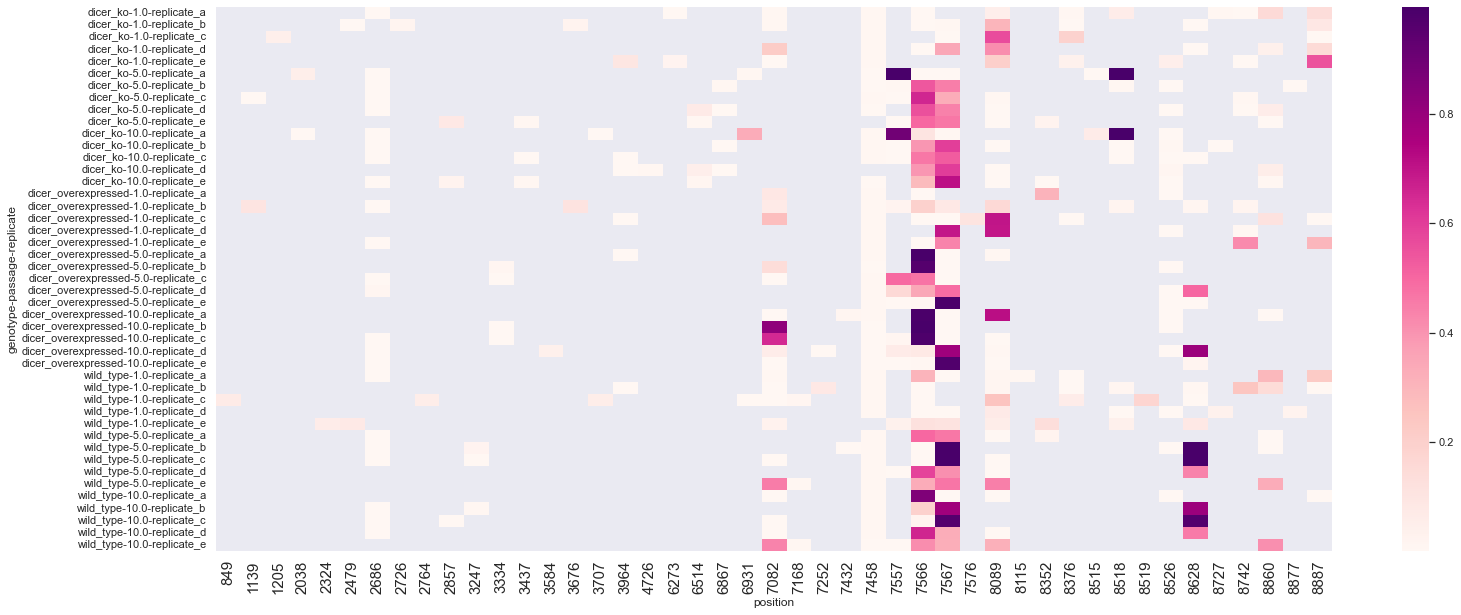

In [7]:
sns.set(rc={'figure.figsize':(25,10)})

# Pivot table 
df_heatmap = df[['genotype', 'replicate', 'passage', 'position', 'frequency']]
df_heatmap = df_heatmap.pivot_table(values='frequency', 
                                    index=[ 'genotype', 'passage', 'replicate'], 
                                    columns='position',
                                    aggfunc=np.max,
                                   )

positions = df_heatmap.columns.to_list()

# plot heatmap in normal scale

g = sns.heatmap(df_heatmap, xticklabels = positions, cmap="RdPu")
fig = g.get_figure()

plt.xticks(rotation=90, fontsize=15)
plt.show()

In [8]:
fig.savefig("./000__Manuscript_figures/Figure_4A__heatmap_nonsyn_muts.pdf")
fig.savefig("./000__Manuscript_figures/Figure_4A__heatmap_nonsyn_muts.svg")